# Dog Image Segmentation On Custom Data



### Import Dependencies

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches



C:\Users\CYBERSPACE\anaconda3\envs\our\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CYBERSPACE\anaconda3\envs\our\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CYBERSPACE\anaconda3\envs\our\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CYBERSPACE\anaconda3\envs\our\lib\site-packages\tensorf

In [2]:
# Root directory of the project
# / is the root folder of the filesystem.
# ./ usually denotes the current folder that your program or script is in, usually the same one with the file you run.
# ../ denotes the folder above the current one.

# ROOT_DIR = os.path.abspath("../")
ROOT_DIR = os.path.abspath("../")

In [3]:
ROOT_DIR

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn'

In [4]:
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config



Using TensorFlow backend.


In [5]:
Config

mrcnn.config.Config

In [6]:
from project.dog import dog

In [7]:
dog

<module 'project.dog.dog' from 'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\project\\dog\\dog.py'>

In [8]:
# ‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\mask_rcnn_coco.h5

In [9]:
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [10]:
MODEL_DIR

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\logs'

In [11]:
# ‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\mask_rcnn_coco.h5

In [12]:
# ‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\mask_rcnn_dog.h5

In [13]:

BALLON_WEIGHTS_PATH = r"‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\mask_rcnn_balloon.h5"  # TODO: update this path

In [14]:
BALLON_WEIGHTS_PATH = BALLON_WEIGHTS_PATH.strip("‪u202a")

In [15]:
BALLON_WEIGHTS_PATH

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\mask_rcnn_balloon.h5'

In [16]:
# ‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\dataset

In [17]:
config = dog.BalloonConfig()
BALLOON_DIR = r"‪‪C:\Users\CYBERSPACE\Documents\our_mask_rcnn\dataset"

In [18]:
BALLOON_DIR = BALLOON_DIR.strip("‪u202a")

In [19]:
BALLOON_DIR

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\dataset'

In [20]:
BALLOON_DIR = os.path.join(ROOT_DIR, BALLOON_DIR)

In [21]:
BALLOON_DIR

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\dataset'

In [22]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
#     IMAGES_PER_GPU = 1
    

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [23]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [24]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [25]:
# Load validation dataset
dataset = dog.BalloonDataset()


In [26]:
dataset.load_balloon(BALLOON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 61
Classes: ['BG', 'balloon']


In [27]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [28]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_balloon.h5"

# Or, load the last model you trained
weights_path = BALLON_WEIGHTS_PATH

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:\Users\CYBERSPACE\Documents\our_mask_rcnn\mask_rcnn_balloon.h5


image ID: balloon.3945575930_ce99a7e98d_b.jpg (36) C:\Users\CYBERSPACE\Documents\our_mask_rcnn\dataset\train\3945575930_ce99a7e98d_b.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (6,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (6, 4)                min:    0.00000  max:  874.00000  int32
gt_mask                  shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  bool


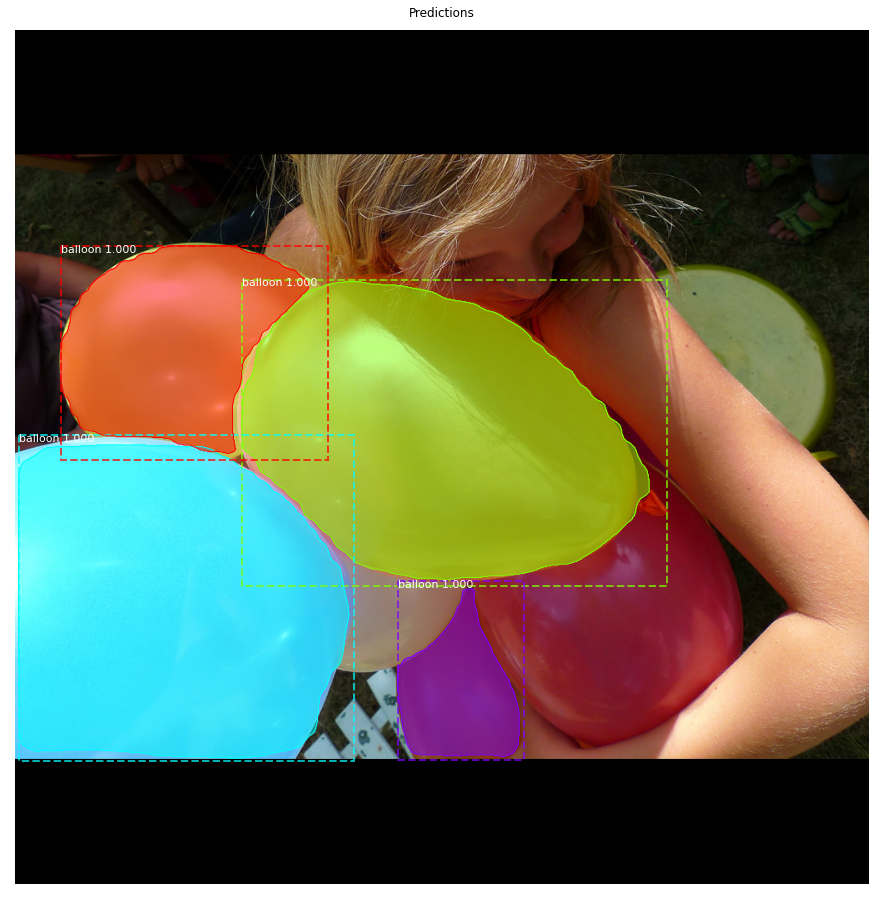

In [29]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

In [30]:
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [31]:
IMAGE_DIR

'C:\\Users\\CYBERSPACE\\Documents\\our_mask_rcnn\\images'

In [32]:
import skimage.io


In [35]:
class_names = ['BG','balloon']

Processing 1 images
image                    shape: (768, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


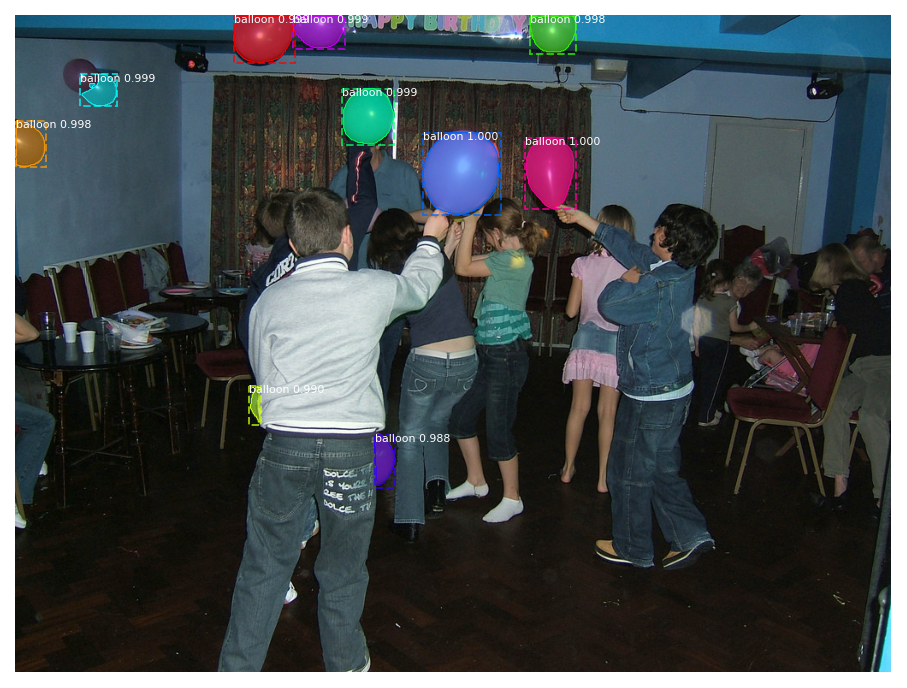

In [36]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# Run detection
results = model.detect([image], verbose=1)


# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])
